<font color='BLUE'><u><b><h2>Data Science & Business Analytics Tasks</h2></b></u></font>

# GRIP @ The Sparks Foundation
<font color='GREEN'><h3><u>TASK 1</u> - Predict the percentage of an student based on the number of study hours.</font></h3>
<font color='GREEN'> <h3><b>By - Mudrika Yaduvanshi</h3></b></font> 

Dataset Link - http://bit.ly/w-data 

Problem statement : <font color='GREEN'><b>What will be predicted score if a student studies for 9.25 hours/day?</b></font>

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

## IMPORTING DATASET

Dataset Link - https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [2]:
score=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")


In [3]:
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
score.shape

(25, 2)

In [5]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##  DISTRIBUTION OF SCORES

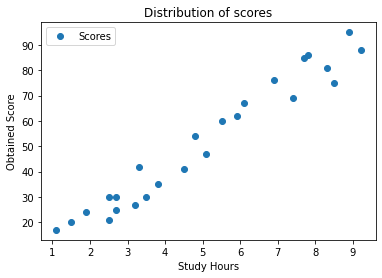

In [7]:
score.plot(x="Hours", y="Scores",style="o")
plt.title("Distribution of scores")
plt.xlabel("Study Hours") 
plt.ylabel("Obtained Score")
plt.show()

By observing the distribution graph we can say here is a strong linear relationship between scores and study hours as it tends to a straight line. So this dataset is ideal to perform linear regression.

## TRAIN AND TEST SPLIT DATA

In [8]:
x1 =score.iloc[:,0].values
y1 = score.iloc[:,1].values
x = x1.reshape(-1,1)
y = y1.reshape(-1,1)

<h3><u><b>RANDOM LINEAR REGRESSION MODEL</b></u></h3>
<font color='BLUE'><b>(Applying on TEST data)</b><font>

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)

LinearRegression()

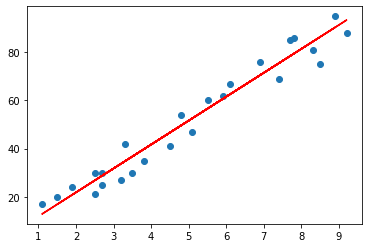

In [12]:
line = linearRegressor.coef_*x+linearRegressor.intercept_
plt.scatter(x, y)
plt.plot(x, line, color="red")
plt.show()

## ACCURACY SCORE FROM TRAINING AND TEST DATA

In [13]:
print('Test Score')
print(linearRegressor.score(x_test, y_test))
print('Training Score')
print(linearRegressor.score(x_train, y_train))

Test Score
0.9367661043365055
Training Score
0.9484509249326872


In [14]:
print(x_test) # Testing data -(Hours)
y_pred = linearRegressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## PREDICTION ON TEST AND TRAIN DATA

In [16]:
y_pred= linearRegressor.predict(x_test)
x_pred= linearRegressor.predict(x_train)

## SOLUTION FOR PROBLEM STATEMENT

In [17]:
print('Score of student who studied for 9.25 hours a day', linearRegressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [[93.89272889]]


In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997


AFTER BUILDING THE LINEAR REGRESSION MODEL AND OBTAIN THE PREDICTION WE CAN CONCLUDE "PREDICTED SCORE OF A STUDENT WHO STUDY 9.25 HRS/ DAY WILL BE ABLE TO SCORE 93.89